In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import netCDF4 as nc

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/regcm-output/BD_SRF.2005100100.nc


In [2]:
print(os.name)

posix


In [3]:
rdata = nc.Dataset('/kaggle/input/regcm-output/BD_SRF.2005100100.nc', 'r', format='NETCDF4')
wdata = nc.Dataset('/kaggle/working/out1.nc', 'a', format='NETCDF4')
# g1=wdata1.createGroup("/analyses/g1")
# g2=wdata1.createGroup("/analyses/g2")
# print(wdata1.groups)
# wdata1.close()
# rdata.close()

In [4]:
# creating dimensions for nc file
level = wdata.createDimension("level", None)
time = wdata.createDimension('time', None)
jx = wdata.createDimension('jx', 57)
lon = wdata.createDimension('iy', 57)
ts = wdata.createVariable('ts', 'f8', ('time', 'iy', 'jx'))
time = wdata.createVariable('time', 'S19', ('time'))

In [5]:
tsr = rdata.variables['ts']
# wdata.dimensions

ts.standard_name='surface_temperature'
ts.long_name='Surface Temperature'
ts.units = 'K'
ts.grid_mapping = 'crs'
ts.coordinates = 'xlat xlon'
ts.cell_methods = tsr.cell_methods
wdata.variables

print(ts.coordinates==tsr.coordinates)

# ts = rdata.variables['ts']
# ts.units = 'Deg C'

True


In [6]:
### Copying attributes of a Dataset, Group or Variable
tsr = rdata.variables['ts']
wdata.setncatts(rdata.__dict__)
print(tsr.__dict__)
ts.setncatts(tsr.__dict__)
ts[:]=tsr[:]
wdata.dimensions


{'long_name': 'Surface Temperature', 'standard_name': 'surface_temperature', 'units': 'K', 'coordinates': 'xlat xlon', 'grid_mapping': 'crs', 'cell_methods': 'time: point'}


{'level': <class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'level', size = 0,
 'time': <class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 30,
 'jx': <class 'netCDF4._netCDF4.Dimension'>: name = 'jx', size = 57,
 'iy': <class 'netCDF4._netCDF4.Dimension'>: name = 'iy', size = 57}

In [7]:
import cftime as ct
rt = rdata.variables['time']
dates = ct.num2date(rt[:], units=rt.units, calendar=rt.calendar)
print(dates[1].isoformat(sep='T', timespec='auto'))

for val in dates:
#     time[i] = dates[i].isoformat(sep='T', timespec='auto')
    print(val)

2005-10-03T00:00:00
2005-10-02 00:00:00
2005-10-03 00:00:00
2005-10-04 00:00:00
2005-10-05 00:00:00
2005-10-06 00:00:00
2005-10-07 00:00:00
2005-10-08 00:00:00
2005-10-09 00:00:00
2005-10-10 00:00:00
2005-10-11 00:00:00
2005-10-12 00:00:00
2005-10-13 00:00:00
2005-10-14 00:00:00
2005-10-15 00:00:00
2005-10-16 00:00:00
2005-10-17 00:00:00
2005-10-18 00:00:00
2005-10-19 00:00:00
2005-10-20 00:00:00
2005-10-21 00:00:00
2005-10-22 00:00:00
2005-10-23 00:00:00
2005-10-24 00:00:00
2005-10-25 00:00:00
2005-10-26 00:00:00
2005-10-27 00:00:00
2005-10-28 00:00:00
2005-10-29 00:00:00
2005-10-30 00:00:00
2005-11-01 00:00:00


In [8]:
time.long_name = rt.long_name
time.standard_name = rt.standard_name
time.calendar = rt.calendar
print(rt, time, sep='\n\n')

<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    long_name: time
    standard_name: time
    units: hours since 1949-12-01 00:00:00 UTC
    calendar: 360_day
    bounds: time_bnds
unlimited dimensions: time
current shape = (30,)
filling on, default _FillValue of 9.969209968386869e+36 used

<class 'netCDF4._netCDF4.Variable'>
vlen time(time)
    long_name: time
    standard_name: time
    calendar: 360_day
vlen data type: <class 'str'>
unlimited dimensions: time
current shape = (30,)


<class 'tuple'>


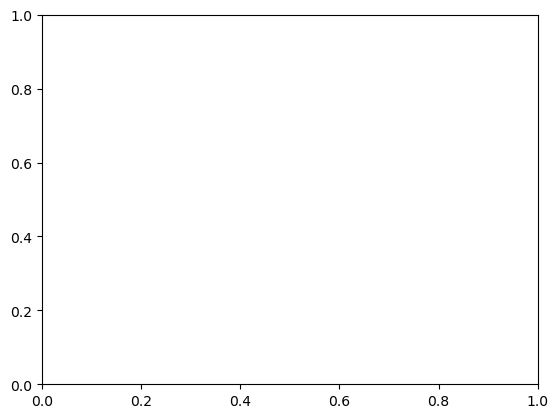

In [9]:
##### This section focuses on visulization of nc datasets.
### For map making libraries used here are matplotlib, cartopy and geocat.
import matplotlib.pyplot as plt

x = np.linspace(0, 2*np.pi, 200)
y = np.sin(x)

fig = plt.subplots()

print(type(fig))
# print(type(ax))

# ax.plot(x, y)

# plt.show()

In [10]:
wdata.close()
rdata.close()